In [46]:
# importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle 

In [47]:
# Loading the dataset
df= pd.read_csv("phishing_urls.csv")

In [48]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [50]:
df.shape

(549346, 2)

### About data
#### It consist 549346 rows and 2 columns .The first column consist of links of website and the second column states whether the site is good or bad(phishing)

In [51]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

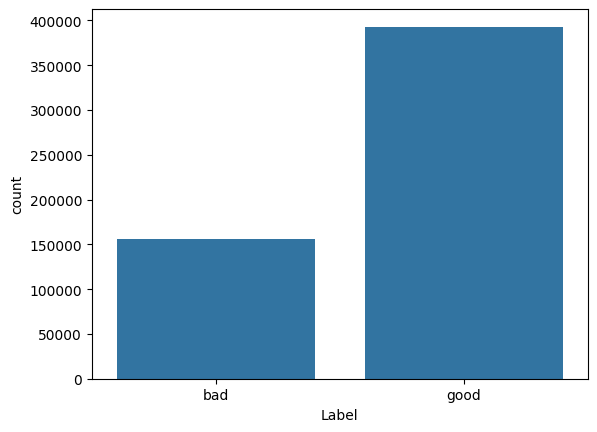

In [52]:
sns.countplot(x="Label",data=df)

### PREPROCESSING

#### Now we can Vectoize the URLs.We can gather words from the URLs using Tokenizer
### RegexpTokenizer
#### we are able to extract the tokens from string by using regular expression with RegexpTokenizer() method.

In [53]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [54]:
tokenizer.tokenize(df.URL[0]) # this will fetch all the words from the first URL

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [55]:
# Tokenizing all the rows 
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 1.213561299999128 sec


In [56]:
df.sample(5)

,URL,Label,text_tokenized
446284,theskinny.co.uk/article/102721-lee-camp-yet-an...,good,"[theskinny, co, uk, article, lee, camp, yet, a..."
342243,freebase.com/view/en/kirsten_costas/-/user/ale...,good,"[freebase, com, view, en, kirsten, costas, use..."
144758,article.wn.com/view/2011/04/14/Tourette_Syndro...,good,"[article, wn, com, view, Tourette, Syndrome, N..."
118265,naafa.com.au/pablo/new%20yahoo/index.htm,bad,"[naafa, com, au, pablo, new, yahoo, index, htm]"
40661,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,bad,"[d, a, cb, a, a, s, sites, googlegroups, com, ..."


### SnowballStemmer
#### Snowball is a small string processing language that gives the root words

In [57]:
stemmer = SnowballStemmer("english") # choose a language

In [58]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 23.280953400004364 sec


In [59]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
52123,www.sci-soft.com/Metrology.htm,good,"[www, sci, soft, com, Metrology, htm]","[www, sci, soft, com, metrolog, htm]"
45017,www528.paypal.ca.74982.securessl-170.mx/js/web...,bad,"[www, paypal, ca, securessl, mx, js, web, apps...","[www, paypal, ca, securessl, mx, js, web, app,..."
447075,tickco.com/baseball/oakland_athletics_tickets.htm,good,"[tickco, com, baseball, oakland, athletics, ti...","[tickco, com, basebal, oakland, athlet, ticket..."
319724,education.com/schoolfinder/us/new-york/mt-vern...,good,"[education, com, schoolfinder, us, new, york, ...","[educ, com, schoolfind, us, new, york, mt, ver..."
358491,imdb.com/name/nm0366464/,good,"[imdb, com, name, nm]","[imdb, com, name, nm]"


In [60]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.12116210000385763 sec


In [61]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [62]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [63]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [64]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


## Creating Model
### CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [65]:
cv = CountVectorizer()

In [66]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [67]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

### LogisticRegression
#### Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [70]:
from sklearn.linear_model import LogisticRegression


In [71]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

c:\Users\qq522\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
lr.score(testX,testY)

0.964051930652337

#### Logistic Regression provide 96% accuracy,Now we will store the score in the dictionary so that we can find which model performs the best.


In [73]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9795271462516596
Testing Accuracy : 0.964051930652337

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.93     36680
        Good       0.99      0.96      0.98    100657

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

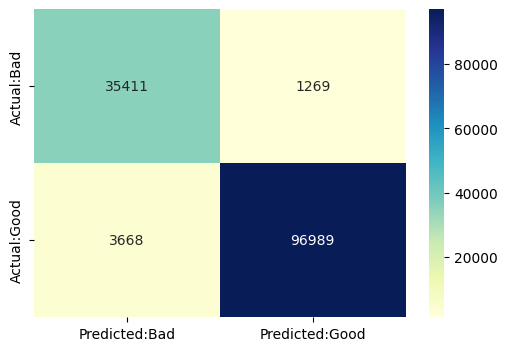

In [74]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

## MultinomialNB
#### The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [75]:
from sklearn.naive_bayes import MultinomialNB 


In [76]:
# create mnb object
mnb = MultinomialNB()

In [77]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [78]:
mnb.score(testX,testY)

0.95688707340338

#### MultinomialNB provide 95% accuracy,so we can store the score in the dictionary

In [79]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9742918237222973
Testing Accuracy : 0.95688707340338

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.93      0.92     38206
        Good       0.97      0.97      0.97     99131

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<Axes: >

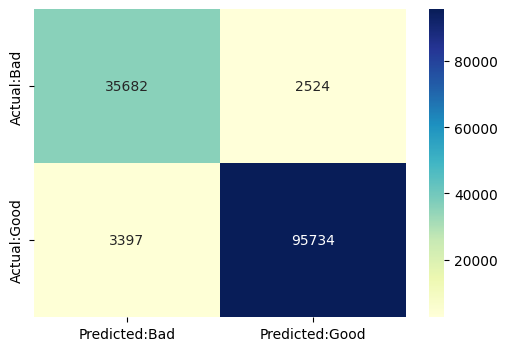

In [80]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [81]:
# # Lets compare the two models and find out which one is best.
# acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
# sns.set_style('darkgrid')
# sns.barplot(acc.index,acc.Accuracy)

#### So, Logistic Regression is the best fit model, Now lets make sklearn pipeline using Logistic Regression

In [82]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [83]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [84]:
pipeline_ls.fit(trainX,trainY)

c:\Users\qq522\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\qq522\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [85]:
pipeline_ls.score(testX,testY)

0.9655882973998267

Training Accuracy : 0.9798596632597831
Testing Accuracy : 0.9655882973998267

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     37100
        Good       0.99      0.96      0.98    100237

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

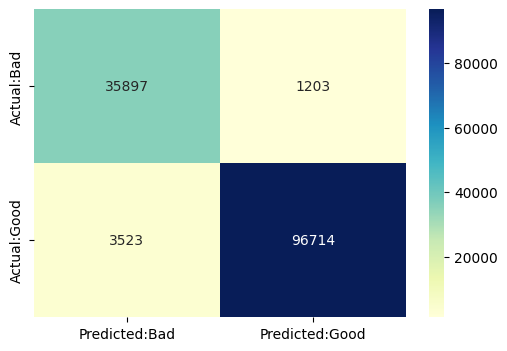

In [86]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [105]:
# I want to test a single URL: web.helloworld.com.au/Discover/Flights.html
# This is a good site, so it should be classified as 'good'
print(pipeline_ls.predict(['profile.callofduty.com/cod/login']))
#   print tokens
tokens = tokenizer.tokenize('web.helloworld.com.au/Discover/Flights.html')
print(tokens)
stemmed = [stemmer.stem(word) for word in tokens]
print(stemmed)
processed_url = ' '.join(stemmed)
print(processed_url)


pipeline_ls.predict(['thewhiskeydregs.com/wp-content/themes/widescreen/includes/temp/promocoessmiles/?84784787824HDJNDJDSJSHD//2724782784/'])


['bad']
['web', 'helloworld', 'com', 'au', 'Discover', 'Flights', 'html']
['web', 'helloworld', 'com', 'au', 'discov', 'flight', 'html']
web helloworld com au discov flight html


array(['bad'], dtype=object)

### Dump the model in pickle.

In [88]:
import pickle

# Assuming `pipeline_ls` is your chosen and fully trained model
pickle.dump(pipeline_ls, open('phishing.pkl', 'wb'))
print("Model saved successfully.")


Model saved successfully.


In [89]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX, testY)
print("Loaded model performance: ", result)
print("end of training and saving model")


Loaded model performance:  0.9655882973998267
end of training and saving model
